In [110]:
from pylab import *
from scipy.optimize import leastsq, curve_fit
from IPython.lib.display import YouTubeVideo
%matplotlib inline

# Esperienza 1: Termometria
**Data**: 22 Ottobre 2018  
**Gruppo**: (Z) R.Di Leonardo, F.Saglimbeni

## Materiale


|Num.  |Descrizione  |Caratteristiche |
|----:|:-----------|:-----------|
|2|Termometri a mercurio| $0.2^\circ C$ per divisione|
|2|Bilance| max. XX Kg, $0.1$ g per divisione|
|2|Calorimetri| Dewar max. 1 L (?), tappo e agitatore|
|1|Cronometro||


## 1. Costante di tempo del calorimetro

### Relazioni di base per il processo ideale
$$T(t)=T_{amb}+(T(0)-T_{amb}) e ^{-\frac{t}{\tau}}\sim T_{amb}+(T(0)-T_{amb})\left(1-\frac{t}{\tau}\right)$$

### Procedura
1. Versiamo nel calorimetro una quantità d'acqua (circa 400 g) alla temperatura di $\sim 50^\circ C$
2. Immergiamo termometro attraverso il buco sul tappo
3. Registriamo la temperatura a intervalli di tempo di pochi minuti

### Dati

`tmin`: tempo minuti  
`tsec`: tempo secondi  
`t`: tempo (min)  
`T`: temperatura ( $^\circ C$ )  
`DT`: risoluzione del termometro

In [111]:
transpose(loadtxt("taucaldata.txt"))

array([[  0. ,   4. ,   7. ,  10. ,  15. ],
       [  0. ,  24. ,  33. ,  57. ,  24. ],
       [ 52.4,  52.2,  52. ,  51.8,  51.6]])

In [134]:
tmin, tsec, T = transpose(loadtxt("taucaldata.txt"))
t = tmin+tsec/60
DT = 0.2
Tamb=25

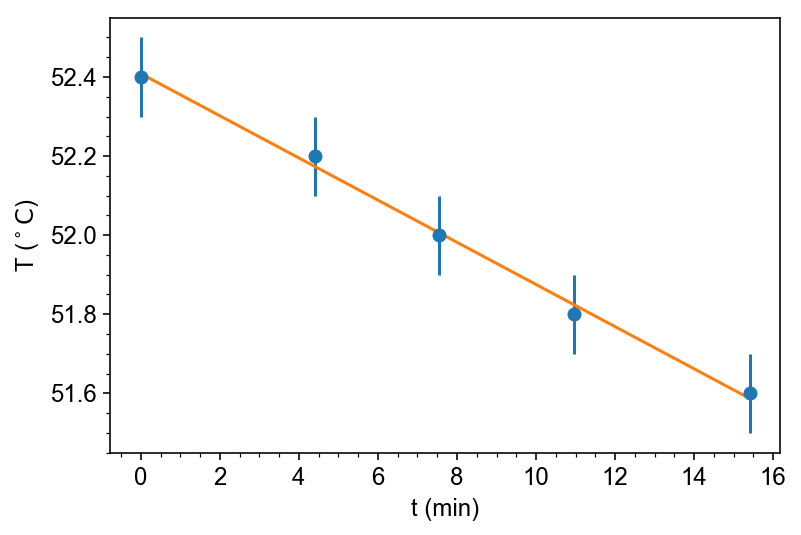

In [135]:
errorbar(t,T, yerr=DT/2, fmt="o")
p=polyfit(t,T,1)
plot(t,polyval(p,t))
xlabel("t (min)")
ylabel("T ($\mathrm{^\circ C}$)")

Per il calcolo delle incertezze sui parametri di fit (e molto altro) un buon testo e' [Numerical Recipes in C](http://apps.nrbook.com/c/index.html)

In [114]:
tau = -(T[0]-Tamb)/p[0]
print("tau = %.0f hours" % (tau/60))

tau = 9 hours


Dopo quanto tempo (min) l'errore sistematico supera 0.1 $^\circ C$?

In [115]:
0.1/(44-Tamb)*tau

2.7036481364052598

## 2. Costante di tempo del termometro

### Relazioni di base per il processo ideale
$$T(t)=T_{amb}+(T(0)-T_{amb}) e ^{-\frac{t}{\tau}}$$

### Procedura
1. Versiamo nel calorimetro una quantità d'acqua (circa 400 g) alla temperatura di $\sim 50^\circ C$
2. Immergiamo termometro nel calorimetro
3. Registriamo la temperatura sul termometro mediante un video a 30 fps

### Dati

`i`: indice del frame  
`fps` : framerate  
`t`: tempo (s)  
`T`: temperatura ( $^\circ C$ )  
`DT`: risoluzione del termometro (distanza tra due tacche)  
`sT`: incertezza (deviazione standard) su T

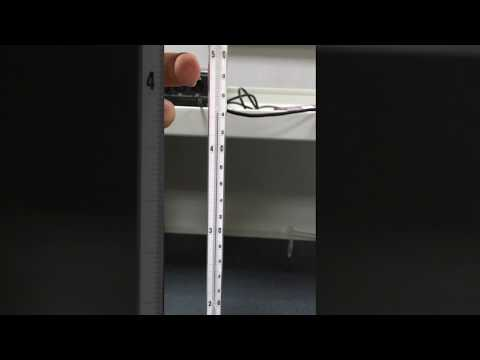

In [116]:
YouTubeVideo('7yCxo5OwBIw')

In [117]:
fps=30
i=array([91,96,102,108,116,135,157,185,209,241,302,365,469,681])
T=array([28.1,29,30,31,32,34,36,38,40,42,44,45,46,47])
DT = .2
sT = DT/sqrt(12)

t=i/fps
t=t-t[0]

In [118]:
def expofun(x, tau, T0, DeltaT):
    return T0-DeltaT*exp(-x/tau)

In [119]:
p, pcov = curve_fit(expofun, t, T, p0=[5, 48, 20], sigma = sT , absolute_sigma = True)
tau, T0, DeltaT = p

`pcov` è la matrice di covarianza dei parametri ovvero:  
se generiamo nuovi dati sperimentali aggiungendo alle temperature `T` un errore gaussiano con deviazione standard `sT` e fittiamo questi nuovi dati sintetici, i parametri di fit saranno distribuiti con la matrice di covarianza `pcov`.  
In particolare la varianza dei valori ottenuti da questi fit per il primo parametro `tau` è stimata da `pcov[0,0]` mentre la deviazione standard da `sqrt(pcov[0,0])`.  
Per una discussione approfondita si veda "Numerical Recipes in C".

In [120]:
print("tau = %.2f +/- %.2f s" % (tau, sqrt(pcov[0,0])))

tau = 4.02 +/- 0.03 s


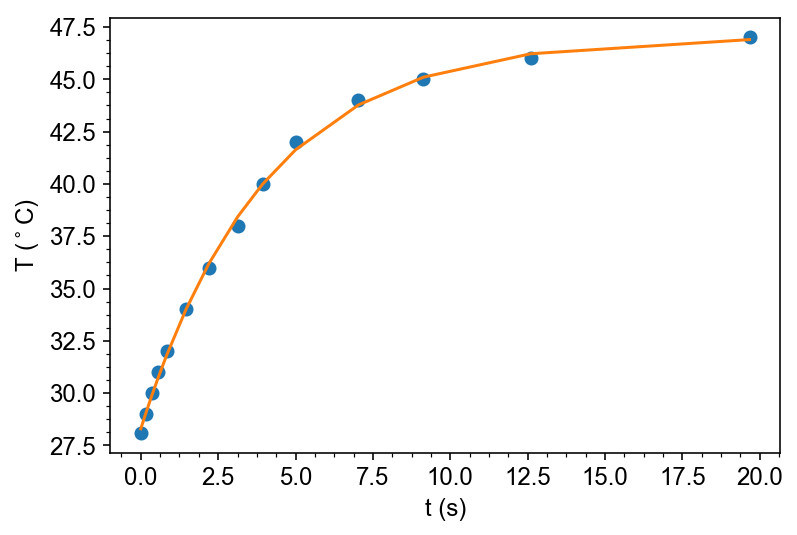

In [121]:
plot(t, T, "o")
plot(t, expofun(t, tau, T0, DeltaT))
xlabel("t (s)")
ylabel("T ($^\circ$C)")

**Nota**  
È possibile stimare il valore di $\tau$ utilizzando la legge di Newton per il raffreddamento [lezione7](https://elearning.uniroma1.it/pluginfile.php/718731/mod_resource/content/3/Lecture-07.pdf)

$$\tau=\frac{C}{h A}$$

Dai valori:

$c$ = 140 J/Kg K  (calore specifico del mercurio)  
$\rho$ = 1.3 10$^4$ Kg/m$^3$ (densità del mercurio)  
$d$= 6 mm (diametro esterno del bulbo, stiamo trascurando la presenza del vetro)  
$l$ = 11 mm (altezza del bulbo)  
$h$ = 750 W/m$^2$K (coefficiente di convezione in acqua statica) 

otteniamo:

$$\tau=3.6\;s$$

## 3. Calore specifico

### Relazioni di base per il processo ideale

Due sistemi termodinamici di masse $m_1, m_2$ e calori specifici $c_1, c_2$ si trovano inizialmente in due recipienti separati (di cui almeno uno un calorimetro) alle due temperature iniziali $T_1, T_2$. I due sistemi vegono "mescolati" all'interno di uno stesso calorimetro e raggiungono una temperatura comune di equilibrio $T_e$. Dette $Q_1$ e $Q_2$ le quantità di calore assorbite dai due sistemi nel corso della trasformazione dal primo principio otteniamo:

$$\Delta U=\Delta U_1+\Delta U_2=Q_1-L_1+Q_2-L_2=0$$

Poichè durante la trasformazione il sistema composto non compie lavoro $L_1+L_2=0$ da cui $Q_1+Q_2=0$.
Nel caso in cui:
* i due sistemi non cambiano fase durante la trasformazione 
* i due calori specifici sono costanti nei rispettivi intervalli di temperatura attraversati dai due sistemi
si ha:

$$Q_1=C_1 (T_e-T_1)$$
$$Q_2=C_2 (T_e-T_2)$$

imponendo $Q_1+Q_2=0$ e risolvendo per il calore specifico incognito, e.g. $C_2$:

$$ 
C_2 = C_1 \frac{T_1-T_e}{T_e-T_2} 
$$

### Possibili cause di errore sistematico

1. perdite di calore durante l'apertura del calorimetro prima del mescolamento
1. non adiabaticità del calorimetro (perdite di calore verso l'ambiente anche a calorimetro chiuso)
1. variazioni di temperatura di uno dei due corpi subite durante il trasporto prima del mescolamento
1. taratura degli strumenti

### Procedura

Per minimizzare gli errori sistematici di tipo 1. (vedi sopra) proponiamo una procedura che non richiede l'apertura del tappo del calorimetro principale:

1. In uno dei due calorimetri (detto principale) immergiamo il materiale di calore specifico incognito $c$ in un bagno di acqua calda alla temperatura $T_1$.
2. In un recipiente esterno (bottiglia di plastica) versiamo acqua fredda alla temperatura $T_2$.
3. Registriamo le due temperature misurate per mezzo di due termometri distinti.
4. Con l'aiuto di un imbuto di carta versiamo rapidamente acqua fredda attraverso uno dei buchi presenti sul tappo del calorimetro principale fino a che la temperatura letta sul termometro del calorimetro principale si porti approssimativamente a metà tra $T_1$ e $T_2$ 
5. Registriamo la temperatura "di equilibrio" $T_e$ del calorimetro principale.

#### Possibili miglioramenti
1. Sostituire la bottiglia di plastica con un recipiente con migliore isolamento termico
2. Dopo il mesolamento, registrare la temperatura del calorimetro a intervalli regolari per estrarre la temperatura di equilibrio da una procedura di estrapolazione a $t=0$.

### Dati
Tutte le masse sono espresse in grammi e le temperature in gradi centigradi e i calori specifici in J/C/g

`mcalo`: massa calorimetro vuoto  
`mo`: massa totale due oggetti  
`mc`: massa iniziale acqua calda nel calorimetro  

`mf1`: prima massa di acqua fredda versata  
`mf2`: seconda massa di acqua fredda versata

`Te1`: temperatura di equilibrio dopo aver versato `mf1`  
`Te2`: temperatura di equilibrio dopo aver versato `mf2`

`ca`: calore specifico acqua

In [122]:
mcalo=690.1
mc=955.8-mcalo
print("mc = %.2f g" % mc)

mo=389.9

mf1=524.9-416.1
mf2=416.1-254.2
print("mf1 = %.2f g" % mf1)
print("mf2 = %.2f g" % mf2)

T1=51.6
T2=20.6
Te1=44
Te2=37.8

mc = 265.70 g
mf1 = 108.80 g
mf2 = 161.90 g


Calore specifico acqua
![water](https://syeilendrapramuditya.files.wordpress.com/2011/08/water_specific_heat_capacity_vs_temperature.gif?w=500&h=300)

In [123]:
ca = 4.18

#### Primo versamento
La capacità termica del contenuto del calorimetro prima di versare l'acqua fredda è:

In [124]:
r=(Te1-T2)/(T1-Te1)
C1 = ca*mf1*r
print(C1,"J/C")

1400.255999999999 J/C


di cui `C1a` sono dovuti alla massa d'acqua `mc`:

In [125]:
C1a = mc*ca
print(C1a,"J/C")

1110.6259999999997 J/C


e `C1b` all'equivalente in acqua del calorimetro `me`

In [126]:
me = 33.74
sme=2.0
C1b = ca*me
print(C1b, "J/C")

141.0332 J/C


Da cui otteniamo per il calore specifico dell'oggetto:

In [127]:
co1=(C1-C1a-C1b)/mo
print("%.3f J/C/g" % co1)

0.381 J/C/g


L'incertezza su `co1` sarà data da:

In [128]:
sT=.2/sqrt(12)
sr=sT*r*sqrt(1/(T1-Te1)**2+1/(Te1-T2)**2+(T1-T2)**2/(Te1-T2)**2/(T1-Te1)**2)
sco1=sqrt((ca*mf1*sr)**2+(ca*sme)**2)/mo
print("calore specifico: %.2f +/- %.2f J/C/g" % (co1, sco1))

calore specifico: 0.38 +/- 0.05 J/C/g


#### Secondo versamento
La capacità termica del contenuto del calorimetro prima di versare l'acqua fredda è:

In [129]:
r=(Te2-T2)/(T1-Te2)
C2 = ca*(mf1+mf2)*r
print(C2,"J/C")

1410.3077681159411 J/C


Da cui otteniamo per il calore specifico dell'oggetto:

In [130]:
co2=(C2-C1a-C1b)/mo
sr=sT*r*sqrt(1/(T1-Te2)**2+1/(Te2-T2)**2+(T1-T2)**2/(Te2-T2)**2/(T1-Te2)**2)
sco2=sqrt((ca*(mf1+mf2)*sr)**2+(ca*sme)**2)/mo
print("calore specifico: %.2f +/- %.2f J/C/g" % (co2, sco2))

calore specifico: 0.41 +/- 0.04 J/C/g


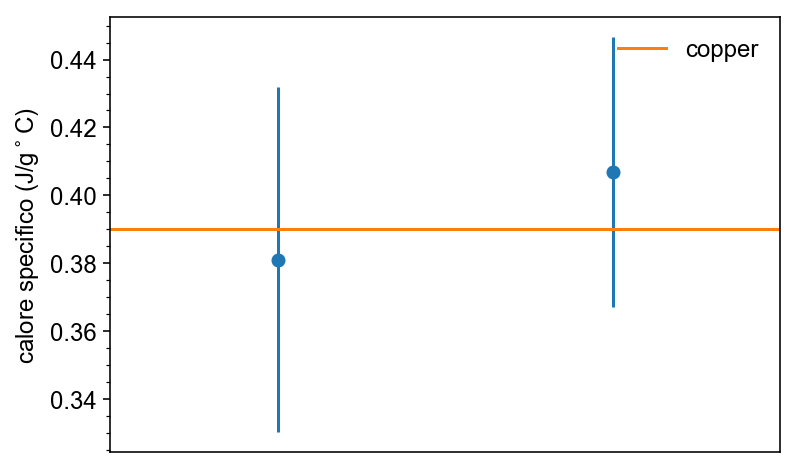

In [131]:
errorbar([1,2],[co1,co2], yerr=[sco1,sco2], fmt="o")
ylabel("calore specifico (J/g$^\circ$C)")
xticks([])
xlim(.5,2.5)
axhline(0.39, color="C1", label="copper")
legend(frameon=False)

## 4. Equivalente in acqua del calorimetro

### Procedura

1. In uno dei due calorimetri versiamo acqua calda alla temperatura $T_1$.
2. In un recipiente esterno (bottiglia di plastica) versiamo acqua fredda alla temperatura $T_2$ e pesiamo.
3. Registriamo le due temperature misurate per mezzo di due termometri distinti.
4. Con l'aiuto di un imbuto di carta versiamo rapidamente acqua fredda attraverso uno dei buchi presenti sul tappo del calorimetro principale fino a che la temperatura letta sul termometro del calorimetro principale si porti approssimativamente a metà tra $T_1$ e $T_2$ 
5. Registriamo la temperatura "di equilibrio" $T_e$ del calorimetro principale ovvero il valore di temperatura quando le variazioni sono dell'ordine di $(T_e-T_{amb})/\tau=0.2^\circ/min$
6. Pesiamo la bottiglia di nuovo per ottenere la massa di acqua versata per sottrazione

### Dati
Tutte le masse sono espresse in grammi, le temperature in gradi centigradi e i calori specifici in J/C/g

`mcalo`: massa calorimetro vuoto  
`m1`: massa iniziale acqua calda nel calorimetro  
`m2`: massa di acqua fredda versata

`T1`: temperatura acqua calda  
`T2`: temperatura acqua fredda  
`Te`: temperatura di equilibrio dopo il mescolamento

`ca`: calore specifico acqua

In [132]:
mcalo=690.1
m1=830.2-mcalo
m2=977.9-mcalo-m1
print("m1=%.0f g" % m1)
print("m2=%.0f g" % m2)


T1=46.4
T2=21.8
Te=35.1

r=(Te-T2)/(T1-Te)
me=m2*r-m1

sT=.2/sqrt(12)
sr=sT*r*sqrt(1/(T1-Te)**2+1/(Te-T2)**2+(T1-T2)**2/(Te-T2)**2/(T1-Te)**2)

sme=m2*sr

print("Massa equivalente in acqua: %.2f +/- %.2f g" % (me, sme)) 

m1=140 g
m2=148 g
Massa equivalente in acqua: 33.74 +/- 2.01 g


**Nota**

È possibile stimare l'equivalente in acqua del calorimetro $m_e$ conoscendo:  
$m$=680 g (massa del calorimetro)  
$c_s$ = 0.510 kJ/Kg K (calore specifico [medio](https://www.azom.com/properties.aspx?ArticleID=965) dell'acciaio)  
$c_a$ = 4.2 kJ/Kg K (calore specifico acqua)

e supponendo che solo metà del calorimetro (la parte interna) partecipi agli scambi termici:

$$m_e = \frac{c_s m/2}{c_a} = 41 g$$

Il fatto che i valori misurati siano in genere più piccoli può essere spiegato dal riempimento solo parziale del calorimetro (non tutta la superficie interna partecipa allo stesso modo agli scambi termici).

## Appendice
![table](http://s3.amazonaws.com/answer-board-image/9b2a6f57-e77d-482c-bbba-928890a2867e.jpeg)

## Referenze

[1] [Guide to the expression of uncertainty in measurement](https://www.bipm.org/utils/common/documents/jcgm/JCGM_100_2008_E.pdf)